In [4]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
from cartopy import crs as ccrs, feature as cfeature
import cartopy.io.shapereader as shpreader
import pandas as pd
from metpy.plots import USCOUNTIES

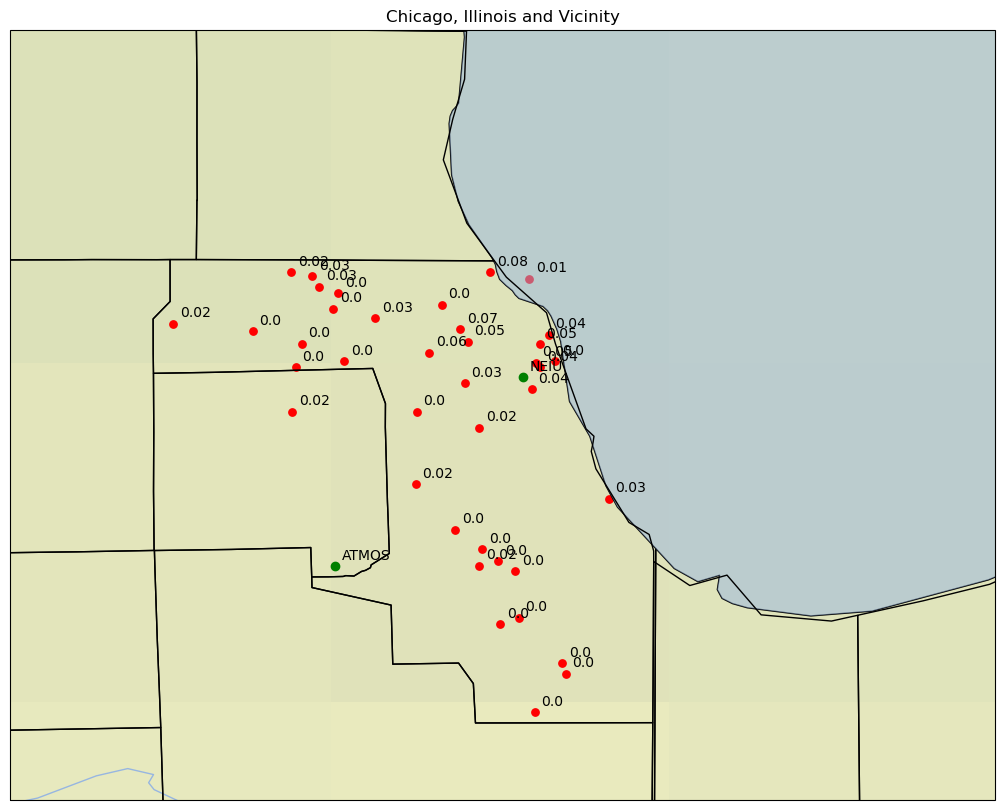

In [5]:
df = pd.read_csv("cocorahs_06062023-_1_.csv")
figure = plt.figure(figsize=(16,10))
ax = figure.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(USCOUNTIES)
ax.set_title('Chicago, Illinois and Vicinity');
ax.set_extent([-88.474769, -87.020042, 41.356063, 42.493302])
ax.stock_img()

crs=ccrs.PlateCarree()
WAGGLE_SITES = {'NEIU'  : [41.980289109, -87.71703552],
                'ATMOS' : [41.701605152, -87.995196552]
               }
ax.plot(WAGGLE_SITES["ATMOS"][1], WAGGLE_SITES["ATMOS"][0], color="Green", marker="o", transform=ccrs.PlateCarree())
ax.text(WAGGLE_SITES["ATMOS"][1]+0.01, WAGGLE_SITES["ATMOS"][0]+0.01, "ATMOS", color="Black", transform=ccrs.PlateCarree())
ax.plot(WAGGLE_SITES["NEIU"][1], WAGGLE_SITES["NEIU"][0], color="Green", marker="o", transform=ccrs.PlateCarree())
ax.text(WAGGLE_SITES["NEIU"][1]+0.01, WAGGLE_SITES["NEIU"][0]+0.01, "NEIU", color="Black", transform=ccrs.PlateCarree())
# modify the plot by adding a scatterplot over the map
for i in range (len(df["Longitude"])):
    ax.text(df["Longitude"][i] +0.01, df["Latitude"][i] +0.01, df["Daily Precip Sum (in.)"][i], color="Black", transform=ccrs.PlateCarree())
plt.scatter(
    x=df["Longitude"],
    y=df["Latitude"],
    color="red",
    s=28,
    alpha=1,
    transform=ccrs.PlateCarree()
)
plt.show()

In [6]:
print(df)

   Station Number               Station Name  Daily Precip Sum (in.)  \
0      IL-CK-12\t         Bridgeview 1.3 NNW                    0.00   
1        IL-CK-14            Chicago 5.5 ESE                    0.03   
2        IL-CK-53             Glencoe 0.1 NW                    0.08   
3        IL-CK-63  Elk Grove Village 0.6 ESE                    0.00   
4        IL-CK-64           Homewood 0.1 ESE                    0.00   
5        IL-CK-74           Oak Park 1.3 NNE                    0.02   
6        IL-CK-75  Elk Grove Village 2.2 WSW                    0.00   
7        IL-CK-94          Lincolnwood 1.8 E                    0.05   
8        IL-CK-98     La Grange Park 0.7 SSW                    0.02   
9       IL-CK-106      Hoffman Estates 4.6 W                    0.02   
10      IL-CK-121             Palatine 1.3 E                    0.03   
11      IL-CK-131           Schaumburg 2.0 E                    0.00   
12      IL-CK-148            Oak Lawn 1.9 SE                    

In [7]:
file_06132023 = 'http://data.cocorahs.org/export/exportreports.aspx?ReportType=Daily&dtf=1&Format=CSV&State=IL&County=CK&ReportDateType=reportdate&Date=6/13/2023&TimesInGMT=True'

In [9]:
from cartopy import crs as ccrs, feature as cfeature
from metpy.plots import USCOUNTIES

In [10]:
def rain_plot(filepath):
    df = pd.read_csv(filepath)
    figure = plt.figure(figsize=(16,10))
    ax = figure.add_subplot(1,1,1, projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.STATES)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(USCOUNTIES)
    # Sort the times, convert to datetime, and extract the day, month, and year
    year_month_day = pd.to_datetime(df.sort_values('ObservationDate', ascending=False).ObservationDate.values[0]).strftime('%d %b %Y')
    ax.set_title(f'Chicago, Illinois and Vicinity {year_month_day}');
    ax.set_extent([-88.474769, -87.020042, 41.356063, 42.493302])
    ax.stock_img()

    crs=ccrs.PlateCarree()
    WAGGLE_SITES = {'NEIU'  : [41.980289109, -87.71703552],
                    'ATMOS' : [41.701605152, -87.995196552]
                   }
    ax.plot(WAGGLE_SITES["ATMOS"][1], WAGGLE_SITES["ATMOS"][0], color="Green", marker="o", transform=ccrs.PlateCarree())
    ax.text(WAGGLE_SITES["ATMOS"][1]+0.01, WAGGLE_SITES["ATMOS"][0]+0.01, "ATMOS", color="Black", transform=ccrs.PlateCarree())
    ax.plot(WAGGLE_SITES["NEIU"][1], WAGGLE_SITES["NEIU"][0], color="Green", marker="o", transform=ccrs.PlateCarree())
    ax.text(WAGGLE_SITES["NEIU"][1]+0.01, WAGGLE_SITES["NEIU"][0]+0.01, "NEIU", color="Black", transform=ccrs.PlateCarree())
    # modify the plot by adding a scatterplot over the map
    for i in range (len(df["Longitude"])):
        ax.text(df["Longitude"][i] +0.01, df["Latitude"][i] +0.01, df["TotalPrecipAmt"][i], color="Black", transform=ccrs.PlateCarree())
    plt.scatter(
        x=df["Longitude"],
        y=df["Latitude"],
        color="red",
        s=28,
        alpha=1,
        transform=ccrs.PlateCarree()
    )
    plt.show()

### Cocorahs Rain Gauges
showing rainfall amounts in the Chicago land area

In [49]:
file_06062023= "http://data.cocorahs.org/export/exportreports.aspx?ReportType=Daily&dtf=1&Format=CSV&State=IL&County=CK&ReportDateType=reportdate&Date=6/6/2023&TimesInGMT=False"

In [63]:
df = pd.read_csv(file_06132023)
df

,ObservationDate,ObservationTime,EntryDateTime,StationNumber,StationName,Latitude,Longitude,TotalPrecipAmt,NewSnowDepth,NewSnowSWE,TotalSnowDepth,TotalSnowSWE,DateTimeStamp
0,2023-06-13,12:30 PM,2023-06-13 12:32 PM,IL-CK-12,Bridgeview 1.3 NNW,41.755015,-87.817285,0.04,NA,NA,NA,NA,2023-06-13 12:31 PM
1,2023-06-13,12:00 PM,2023-06-13 12:27 PM,IL-CK-14,Chicago 5.5 ESE,41.800772,-87.590335,T,NA,NA,NA,NA,2023-06-13 12:27 PM
2,2023-06-13,12:00 PM,2023-06-13 10:02 PM,IL-CK-42,Mount Prospect 3.0 NE,42.096184,-87.896703,0.01,NA,NA,NA,NA,2023-06-13 10:01 PM
3,2023-06-13,12:00 PM,2023-06-13 12:03 PM,IL-CK-50,Palos Park 1.3 SW,41.652814,-87.863067,0.04,NA,NA,NA,NA,2023-06-13 12:02 PM
4,2023-06-13,12:00 PM,2023-06-13 01:07 PM,IL-CK-63,Elk Grove Village 0.6 ESE,42.003899,-87.981309,0.04,NA,NA,NA,NA,2023-06-13 01:06 PM
5,2023-06-13,12:00 PM,2023-06-13 01:10 PM,IL-CK-64,Homewood 0.1 ESE,41.557694,-87.659444,0.06,NA,NA,NA,NA,2023-06-13 01:10 PM
6,2023-06-13,12:00 PM,2023-06-13 12:19 PM,IL-CK-69,Park Forest 0.8 NNE,41.492800,-87.681489,0.02,NA,NA,NA,NA,2023-06-13 12:18 PM
7,2023-06-13,11:20 AM,2023-06-13 11:25 AM,IL-CK-74,Oak Park 1.3 NNE,41.906214,-87.781880,0.04,0.0,NA,NA,NA,2023-06-13 11:25 AM
8,2023-06-13,12:00 PM,2023-06-13 12:06 PM,IL-CK-75,Elk Grove Village 2.2 WSW,41.995258,-88.052741,0.03,NA,NA,NA,NA,2023-06-13 12:06 PM
9,2023-06-13,01:00 PM,2023-06-13 01:08 PM,IL-CK-211,Oak Lawn 1.6 WNW,41.726860,-87.777733,0.04,NA,NA,NA,NA,2023-06-13 01:08 PM


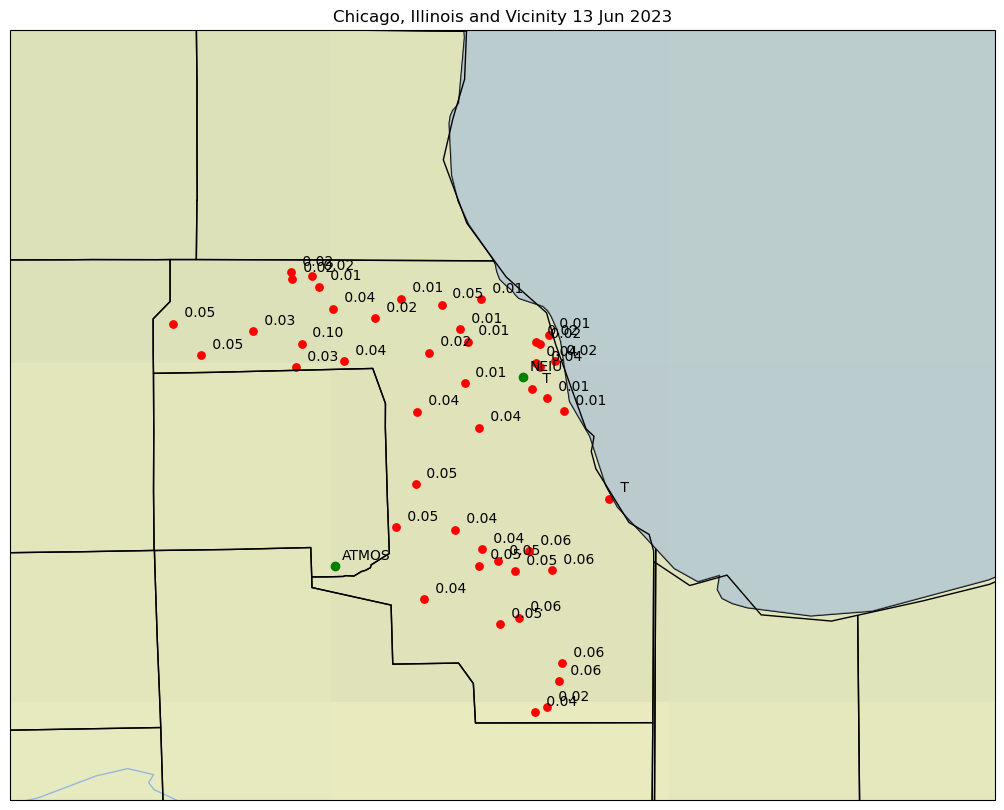

In [11]:
rain_plot(file_06132023)

In [14]:
file_06062023 = "http://data.cocorahs.org/export/exportreports.aspx?ReportType=Daily&dtf=1&Format=CSV&State=IL&County=CK&ReportDateType=reportdate&Date=6/6/2023&TimesInGMT=False"

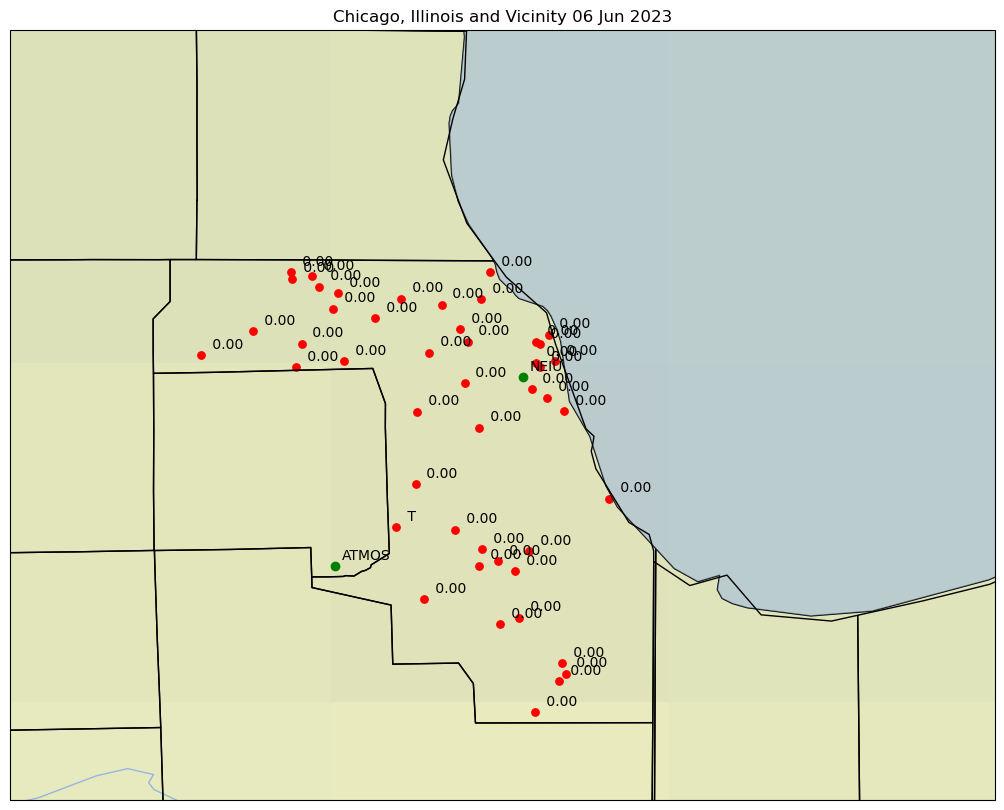

In [16]:
rain_plot(file_06062023)

In [51]:
df

,StartDate,EndDateTime,EntryDateTime,StationNumber,StationName,Latitude,Longitude,TotalPrecipAmt,TotalSnowDepth,TotalSnowSWE,DateTimeStamp
0,2023-06-13,2023-06-15 12:05 PM,2023-06-15 12:07 PM,IL-CK-53,Glencoe 0.1 NW,42.135650,-87.765394,0.51,NA,NA,2023-06-15 12:07 PM
1,2023-06-13,2023-06-15 12:00 PM,2023-06-15 11:16 AM,IL-CK-139,Oak Lawn 1.1 N,41.730399,-87.756150,0.60,NA,NA,2023-06-15 11:15 AM
2,2023-06-13,2023-06-14 12:00 PM,2023-06-14 11:43 AM,IL-MG-9,Jacksonville 1.2 SW,39.716362,-90.247330,0.00,NA,NA,2023-06-14 11:43 AM
3,2023-06-13,2023-06-14 01:00 PM,2023-06-14 02:46 PM,IL-CK-296,Chicago Heights 2.4 NNW,41.542771,-87.654073,0.70,NA,NA,2023-06-14 02:45 PM
4,2023-06-13,2023-06-14 12:00 PM,2023-06-15 12:46 AM,IL-WL-154,Naperville 2.9 SSE,41.722890,-88.136350,0.16,NA,NA,2023-06-15 12:45 AM
5,2023-06-12,2023-06-13 01:30 PM,2023-06-14 11:19 PM,IL-VR-44,Danville 2.5 E,40.137442,-87.573009,0.53,NA,NA,2023-06-14 11:18 PM
6,2023-06-12,2023-06-13 12:00 PM,2023-06-13 11:57 AM,IL-WL-16,Homer Glen 0.8 ENE,41.627371,-87.928125,0.13,NA,NA,2023-06-13 11:56 AM
7,2023-06-11,2023-06-13 12:00 PM,2023-06-13 07:55 PM,IL-DP-42,Carol Stream 0.3 SSE,41.913010,-88.129388,0.07,NA,NA,2023-06-13 07:55 PM
8,2023-06-11,2023-06-15 11:00 AM,2023-06-15 01:47 PM,IL-CL-2,Marshall 4.6 W,39.383777,-87.774290,1.13,0.0,0.00,2023-06-15 01:47 PM
9,2023-06-09,2023-06-13 12:30 PM,2023-06-13 12:32 PM,IL-WL-166,Naperville 3.6 SE,41.723127,-88.108765,0.07,NA,NA,2023-06-13 12:32 PM


In [52]:
df = pd.read_csv(file_06132023)

In [53]:
df

,StartDate,EndDateTime,EntryDateTime,StationNumber,StationName,Latitude,Longitude,TotalPrecipAmt,TotalSnowDepth,TotalSnowSWE,DateTimeStamp
0,2023-06-13,2023-06-15 12:05 PM,2023-06-15 12:07 PM,IL-CK-53,Glencoe 0.1 NW,42.135650,-87.765394,0.51,NA,NA,2023-06-15 12:07 PM
1,2023-06-13,2023-06-15 12:00 PM,2023-06-15 11:16 AM,IL-CK-139,Oak Lawn 1.1 N,41.730399,-87.756150,0.60,NA,NA,2023-06-15 11:15 AM
2,2023-06-13,2023-06-14 01:00 PM,2023-06-14 02:46 PM,IL-CK-296,Chicago Heights 2.4 NNW,41.542771,-87.654073,0.70,NA,NA,2023-06-14 02:45 PM
3,2023-06-05,2023-06-13 11:00 AM,2023-06-13 02:18 PM,IL-CK-332,Arlington Heights 1.7 SSW,42.072411,-87.995549,0.02,NA,NA,2023-06-13 02:18 PM
4,2023-06-03,2023-06-13 01:00 PM,2023-06-14 03:40 PM,IL-CK-260,Midlothian 1.2 SE,41.613021,-87.709663,0.00,NA,NA,2023-06-14 03:40 PM
